In [1]:
#installs kagglehub to allow access to import kaggle datasets
!pip install kagglehub

In [2]:
import kagglehub

#links to our second dataset, which analyzes HPI globally from 2015-2024
path = kagglehub.dataset_download("atharvasoundankar/global-housing-market-analysis-2015-2024")

#displays path to dataset
print("Path to dataset files:", path)

import pandas as pd

#imports and prints the dataset for future analysis
data = pd.read_csv(path + "/global_housing_market_extended.csv")
print(data.head())

Path to dataset files: /Users/rileyhaynie15/.cache/kagglehub/datasets/atharvasoundankar/global-housing-market-analysis-2015-2024/versions/1
  Country  Year  House Price Index  Rent Index  Affordability Ratio  \
0     USA  2015         117.454012  116.550001             9.587945   
1     USA  2016         150.807258   51.440915            11.729189   
2     USA  2017         123.194502   70.386040             8.506676   
3     USA  2018         131.423444   91.469020             3.418054   
4     USA  2019         110.461377   56.837048             9.158097   

   Mortgage Rate (%)  Inflation Rate (%)  GDP Growth (%)  \
0           4.493292            1.514121       -0.752044   
1           5.662213            1.880204       -0.545400   
2           2.197469            2.398940        0.930895   
3           4.537724            1.608407       -1.479587   
4           3.700762            1.293249        1.961415   

   Population Growth (%)  Urbanization Rate (%)  Construction Index  
0 

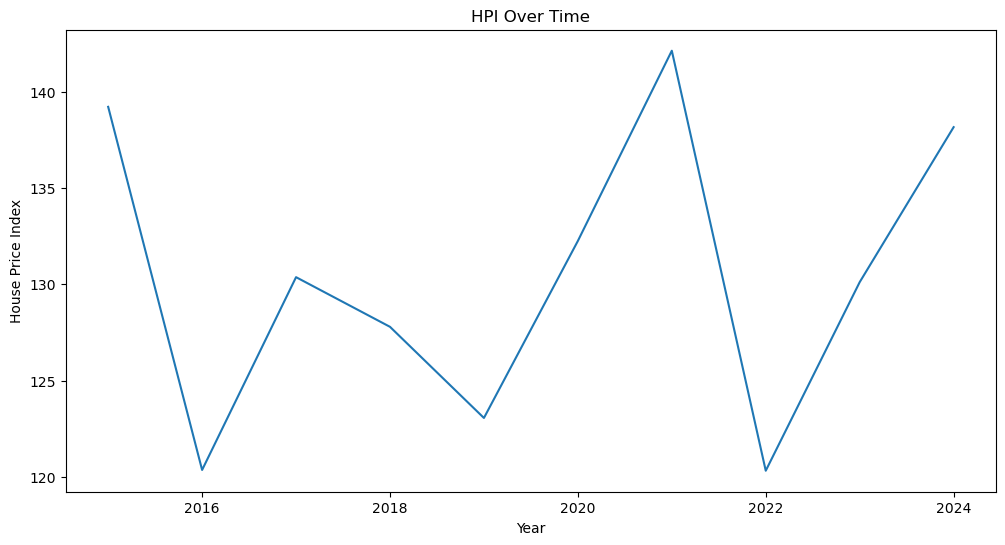

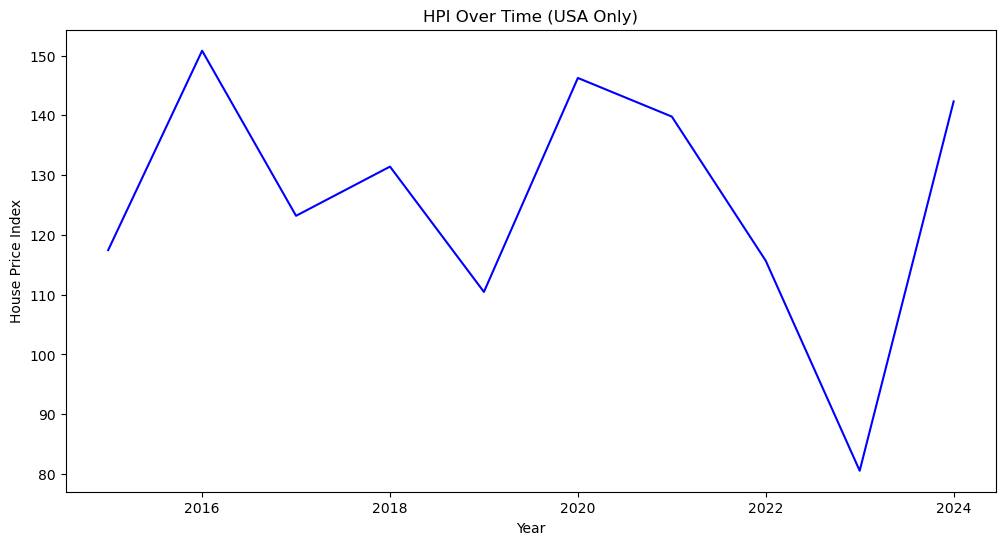

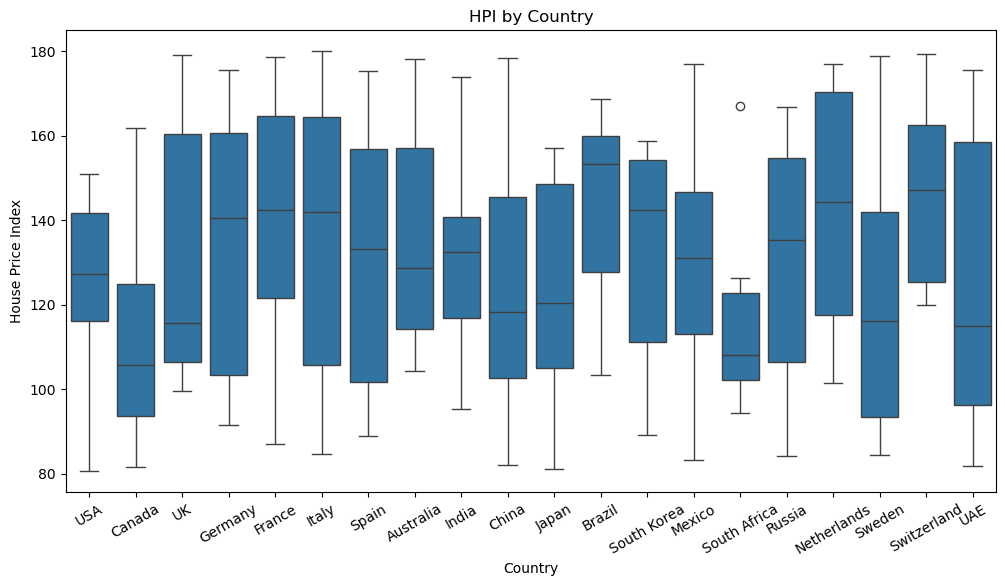

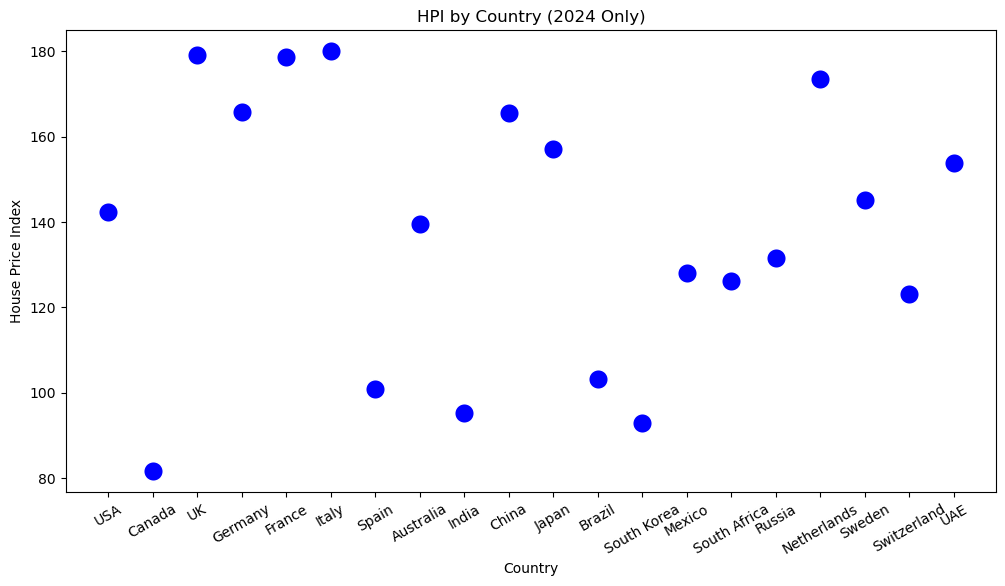

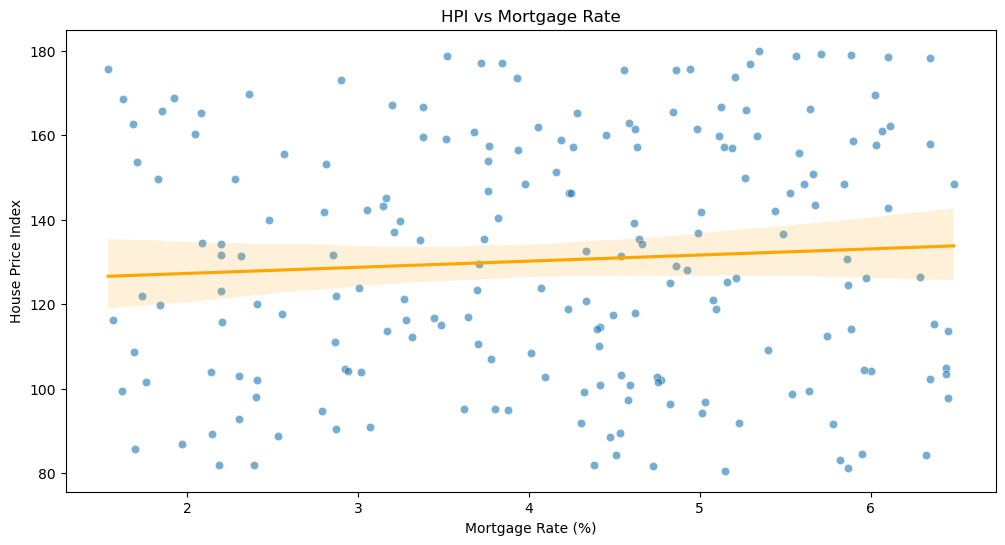

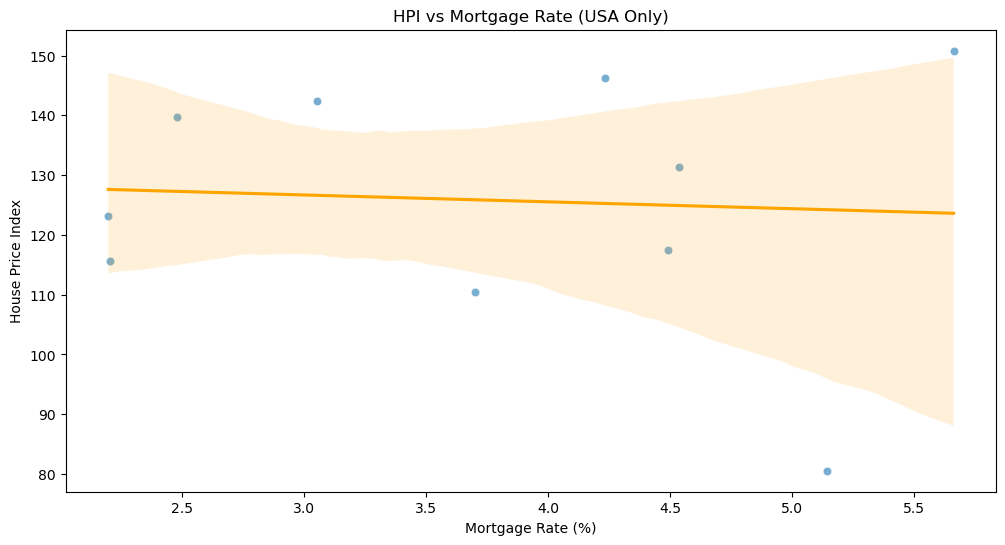

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is a library that can be used along with matplotlib to plot graphs


#defines the columns that we will be using (HPI, Year, Country, Mortgage Rate)
hpi_col = 'House Price Index'
year_col = 'Year'
country_col = 'Country'
mortgage_col = 'Mortgage Rate (%)'

#drop unecessary data from the dataset to get only the variables we are analyzing
df = data[[hpi_col, year_col, country_col, mortgage_col]].dropna()

#first graph, plotting HPI vs. Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=year_col, y=hpi_col, errorbar=None)
plt.title("HPI Over Time")
plt.xlabel("Year")
plt.ylabel("House Price Index")
plt.show()

#first graph, but only include USA data
df_usa = df[df[country_col] == 'USA']

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa, x=year_col, y=hpi_col, errorbar=None, color='blue')
plt.title("HPI Over Time (USA Only)")
plt.xlabel("Year")
plt.ylabel("House Price Index")
plt.show()


#second graph, plotting HPI vs. Country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=country_col, y=hpi_col)
plt.title("HPI by Country")
plt.xlabel("Country")
plt.ylabel("House Price Index")
plt.xticks(rotation=30) #tilts x labels so they fit
plt.show()

#second graph, but only include 2024 data
df_2024 = df[df[year_col] == 2024]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_2024, x=country_col, y=hpi_col, color='blue', s=200)
plt.title("HPI by Country (2024 Only)")
plt.xlabel("Country")
plt.ylabel("House Price Index")
plt.xticks(rotation=30) #tilts x labels so they fit
plt.show()


#third graph, plotting HPI vs. Mortgage Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x=mortgage_col, y=hpi_col, alpha=0.6)
sns.regplot(data=df, x=mortgage_col, y=hpi_col, scatter=False, color="orange")
plt.title("HPI vs Mortgage Rate")
plt.xlabel("Mortgage Rate (%)")
plt.ylabel("House Price Index")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_usa, x=mortgage_col, y=hpi_col, alpha=0.6)
sns.regplot(data=df_usa, x=mortgage_col, y=hpi_col, scatter=False, color="orange")
plt.title("HPI vs Mortgage Rate (USA Only)")
plt.xlabel("Mortgage Rate (%)")
plt.ylabel("House Price Index")
plt.show()
